In [10]:
import torch
import pandas as pd
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
from sklearn.preprocessing import MinMaxScaler

In [11]:
df = pd.read_csv('../Datasets/Netflix_Stock_Price/NFLX.csv', parse_dates=True, index_col=0)
print(df.head())
print(df.info())
print(df.isnull().sum())
df = df.drop('Adj Close', axis=1) # dropping col as the values of this one is same as Close.

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2015-12-16  119.800003  123.000000  118.089996  122.639999  122.639999   
2015-12-17  123.970001  126.349998  122.419998  122.510002  122.510002   
2015-12-18  120.849998  122.190002  117.919998  118.019997  118.019997   
2015-12-21  119.510002  119.589996  115.660004  116.629997  116.629997   
2015-12-22  117.300003  117.430000  114.860001  116.239998  116.239998   

              Volume  
Date                  
2015-12-16  13181000  
2015-12-17  17284900  
2015-12-18  17948100  
2015-12-21  11670000  
2015-12-22   9689000  
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1007 entries, 2015-12-16 to 2019-12-16
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1007 non-null   float64
 1   High       1007 non-null   float64
 2   Low        1007 non-null   floa

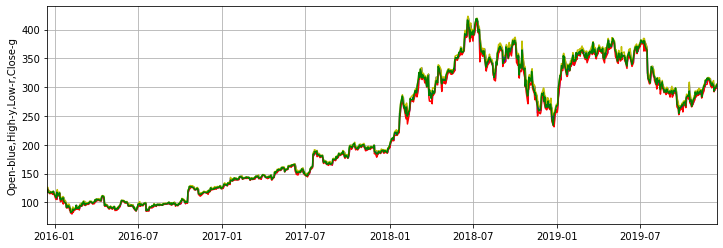

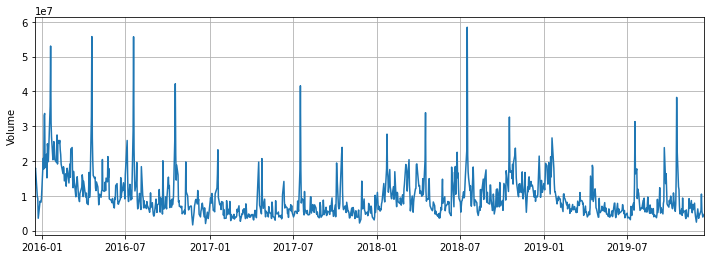

In [12]:
plt.figure(figsize=(12,4))
plt.grid(True)
plt.autoscale(axis='x',tight=True)
plt.ylabel('Open-blue,High-y,Low-r,Close-g')
plt.plot(df['Open'], 'b')
plt.plot(df['High'], 'y')
plt.plot(df['Low'], 'r')
plt.plot(df['Close'], 'g')
plt.show()

plt.figure(figsize=(12,4))
plt.grid(True)
plt.autoscale(axis='x',tight=True)
plt.ylabel('Volume')
plt.plot(df['Volume'])
plt.show()

In [13]:
train = df.head(int(len(df)*0.8))
test = df.tail(len(df) - int(len(df)*0.8))
Scaler = MinMaxScaler(feature_range=(0, 1))
train_norm = Scaler.fit_transform(train)
test_norm = Scaler.transform(test)

#min_max_norm = (train - train.min(axis=0)) / (train.max(axis=0) - train.min(axis=0)) # code for one col only.

In [14]:
train_temp = []
window = 10
for i in range(len(train_norm)-window):
    train_temp.append((torch.FloatTensor(train_norm[i:i+window]),torch.tensor(train_norm[i+window:i+window+1][0][3], dtype=torch.float)))
train = train_temp

test_temp = []
for i in range(len(test_norm)-window):
    test_temp.append((torch.FloatTensor(test_norm[i:i+window]),torch.tensor(test_norm[i+window:i+window+1][0][3], dtype=torch.float)))
test = test_temp

In [15]:
class LSTM_model(nn.Module):
    def __init__(self,input_size=5,hidden_size=128,output_size=1):
        super().__init__()
        self.hidden_size = hidden_size
        self.hidden = (torch.zeros(1,1,self.hidden_size),torch.zeros(1,1,self.hidden_size))
        self.lstm = nn.LSTM(input_size,hidden_size)
        self.out = nn.Linear(hidden_size,output_size)

    def forward(self,x):
        self.hidden = (torch.zeros(1,1,self.hidden_size),torch.zeros(1,1,self.hidden_size))
        lstm_out, self.hidden = self.lstm(x.view(len(x),1,-1), self.hidden)
        pred = self.out(lstm_out.view(len(x),-1))
        return pred[-1]

In [16]:
torch.manual_seed(12345)
model = LSTM_model()
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

In [17]:
preds = []
epochs = 100# note higher epoch does lead to a higher acc.
for i in range(epochs):
    for x, y in train:
        optimizer.zero_grad()
        y_pred = model(x)
        if i+1 == epochs:
            preds.append(y_pred.item())
        loss = criterion(y_pred, y)
        loss.backward()
        optimizer.step()
    if i%10 == 0:
        print(f'Epoch: {i:2} Loss: {loss.item():10.8f}')

/Users/shree/.conda/envs/Machine_Learning_Codes/lib/python3.9/site-packages/torch/nn/modules/loss.py:528: UserWarning: Using a target size (torch.Size([])) that is different to the input size (torch.Size([1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch:  0 Loss: 0.07852701
Epoch: 10 Loss: 0.00036758
Epoch: 20 Loss: 0.00026373
Epoch: 30 Loss: 0.00032430
Epoch: 40 Loss: 0.00031818
Epoch: 50 Loss: 0.00030923
Epoch: 60 Loss: 0.00030088
Epoch: 70 Loss: 0.00029323
Epoch: 80 Loss: 0.00028623
Epoch: 90 Loss: 0.00027980
Epoch: 100 Loss: 0.00027393
Epoch: 110 Loss: 0.00026852
Epoch: 120 Loss: 0.00026358
Epoch: 130 Loss: 0.00025906
Epoch: 140 Loss: 0.00025491
Epoch: 150 Loss: 0.00025110
Epoch: 160 Loss: 0.00024762
Epoch: 170 Loss: 0.00024443
Epoch: 180 Loss: 0.00024152
Epoch: 190 Loss: 0.00023884
Epoch: 200 Loss: 0.00023640
Epoch: 210 Loss: 0.00023417
Epoch: 220 Loss: 0.00023213
Epoch: 230 Loss: 0.00023027
Epoch: 240 Loss: 0.00022858
Epoch: 250 Loss: 0.00022704
Epoch: 260 Loss: 0.00022565
Epoch: 270 Loss: 0.00022440
Epoch: 280 Loss: 0.00022325
Epoch: 290 Loss: 0.00022223
Epoch: 300 Loss: 0.00022130
Epoch: 310 Loss: 0.00022048
Epoch: 320 Loss: 0.00021974
Epoch: 330 Loss: 0.00021909
Epoch: 340 Loss: 0.00021851
Epoch: 350 Loss: 0.00021802
Ep

In [18]:
error = 12
correct_count = 0
model.eval()
for x, y in test:
    with torch.no_grad():
        y_pred = model(x)
        if abs(Scaler.inverse_transform(np.array([0,0,0,y_pred.item(),0]).reshape(1, -1))[0][3] - Scaler.inverse_transform(np.array([0,0,0,y,0]).reshape(1, -1))[0][3]) < error:
            correct_count += 1
print(f'Test Accuracy: {((correct_count/len(test))*100)} error: {error:2}')

Test Accuracy: 88.54166666666666 error: 12
